In [1]:
# Import statements
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

**First, let's write code to read and plot a single file of ARGO float data.

In [4]:
filepath ='D5901105_176.nc'

In [9]:
# Import just one data file using xarray
data = xr.open_dataset(filepath)

# Reformat the data to remove singleton dimensions
data = data.squeeze()
display(data)

# Get the lat and lon
lat = data.LATITUDE.values
lon = data.LONGITUDE.values

# Get the temperature and pressure
temp = data.TEMP.values
pressure = data.PRES.values

<xarray.Dataset>
Dimensions:                       (N_PARAM: 4, N_LEVELS: 77, N_HISTORY: 4)
Dimensions without coordinates: N_PARAM, N_LEVELS, N_HISTORY
Data variables: (12/70)
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY) object ...
    HISTORY_PARAMETER             (N_HISTORY) object ...
    HISTORY_START_PRES            (N_HISTORY) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY) float32 ...
    HISTORY_QCTEST                (N_HISTORY) object ...
Attributes:
    title:                Argo float vertical profile
    institution:          AOML
    source:               Argo float
    history:              2019-04-06T02:00:49Z creation
    references:           http://www.argodatamgt.org/Documentation
    comment:              free text
    user_manual_version:  3.2
    Conventions:          Argo-3.2 CF-1.6
    featureType:          trajectoryProfile

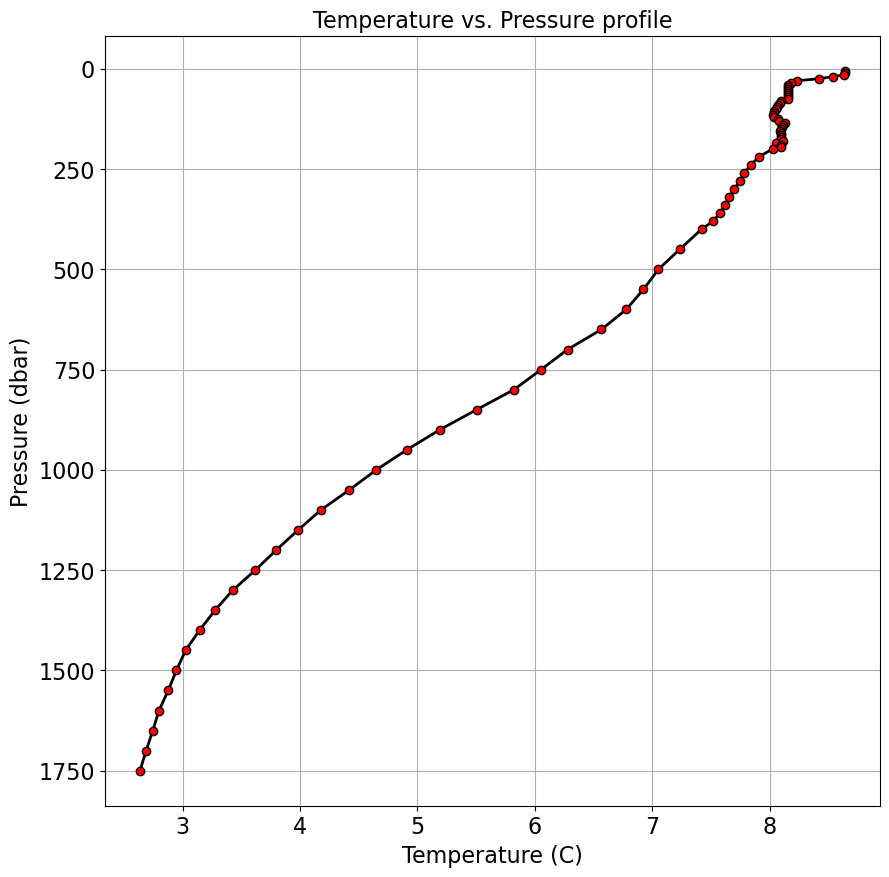

<Figure size 640x480 with 0 Axes>

In [21]:
# Make figure
fig,axs = plt.subplots(figsize=(10,10))

# Plot temperature and pressure
axs.plot(temp, pressure, color='k', lw=2, marker='o', 
         markerfacecolor='red')

# Format figure
axs.invert_yaxis()
axs.grid()
# make a title
axs.set_title('Temperature vs. Pressure profile', fontsize=16)
# set axis labels, increase fontsize
axs.set_xlabel('Temperature (C)', fontsize=16)
axs.set_ylabel('Pressure (dbar)', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

**Let's make two functions:**

1) Read ARGO float data from a file and extract temperature, pressure, latitude, and longitude data.
2) Plot pressure-temperature profiles.

In [55]:
# Create a function for reading the data
def prof_getdata(filepath):
    # Import just one data file using xarray
    data = xr.open_dataset(filepath)
    
    # Reformat the data to remove singleton dimensions
    data = data.squeeze()
    
    # Get the lat and lon
    lat = data.LATITUDE.values
    lon = data.LONGITUDE.values
    # Get the temperature and pressure
    temp = data.TEMP.values
    pressure = data.PRES.values
    
    # return the data we want back
    return lat, lon, temp, pressure
    

# Create a function for plotting the temperature profile
def plot_profile(temp, pressure, name, line_color='k', markercolor='k'):
    # Make figure
    fig,axs = plt.subplots(figsize=(10,10))

    # Plot temperature and pressure
    axs.plot(temp, pressure, color=line_color, lw=2, marker='o', 
             markerfacecolor=markercolor)

    # Format figure
    axs.invert_yaxis()
    axs.grid()
    # make a title
    instrument = name.split('.')[0]
    axs.set_title(f'Temperature vs. Pressure profile: {instrument}', fontsize=16)
    # set axis labels, increase fontsize
    axs.set_xlabel('Temperature (C)', fontsize=16)
    axs.set_ylabel('Pressure (dbar)', fontsize=16)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

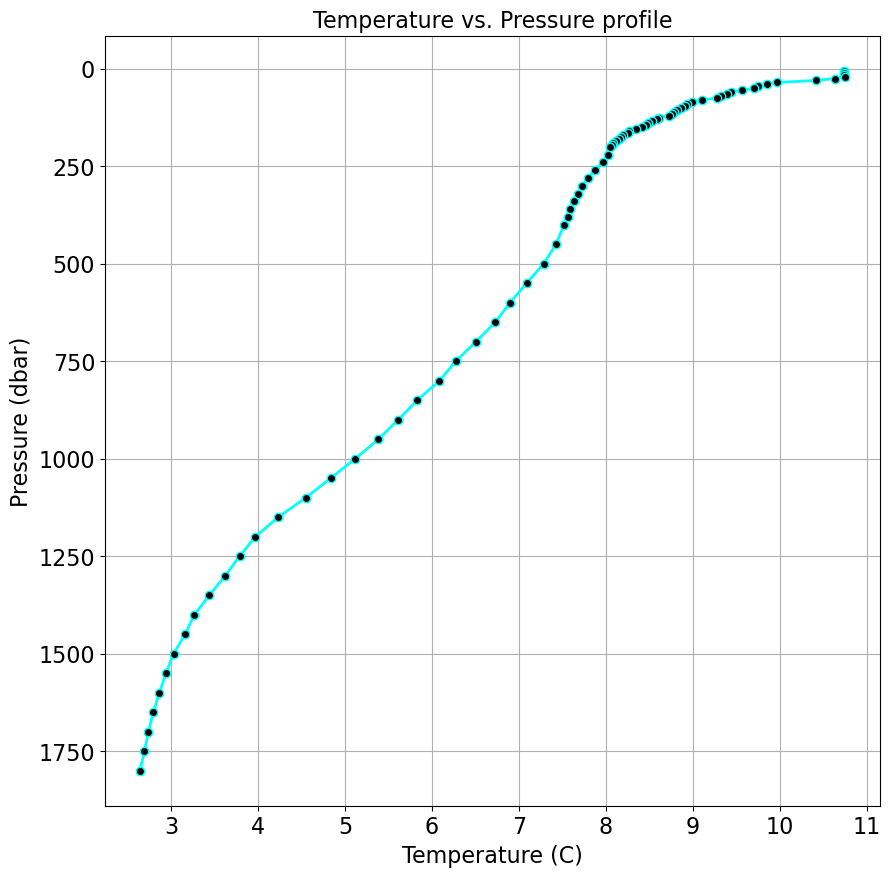

In [47]:
lat, lon, temp, pressure = prof_getdata(filepath='D5901105_181.nc')
plot_profile(temp, pressure, 'cyan')

**Read and plot ARGO float data from each file using a for loop and our functions**

In [56]:
# list of file paths
filepaths = ['D5901105_176.nc', 'D5901105_177.nc', 'D5901105_178.nc', 'D5901105_179.nc',
            'D5901105_180.nc', 'D5901105_181.nc']

# list of colors
colors = ['green', 'orange', 'purple', 'turquoise', 'orchid', 'gold']

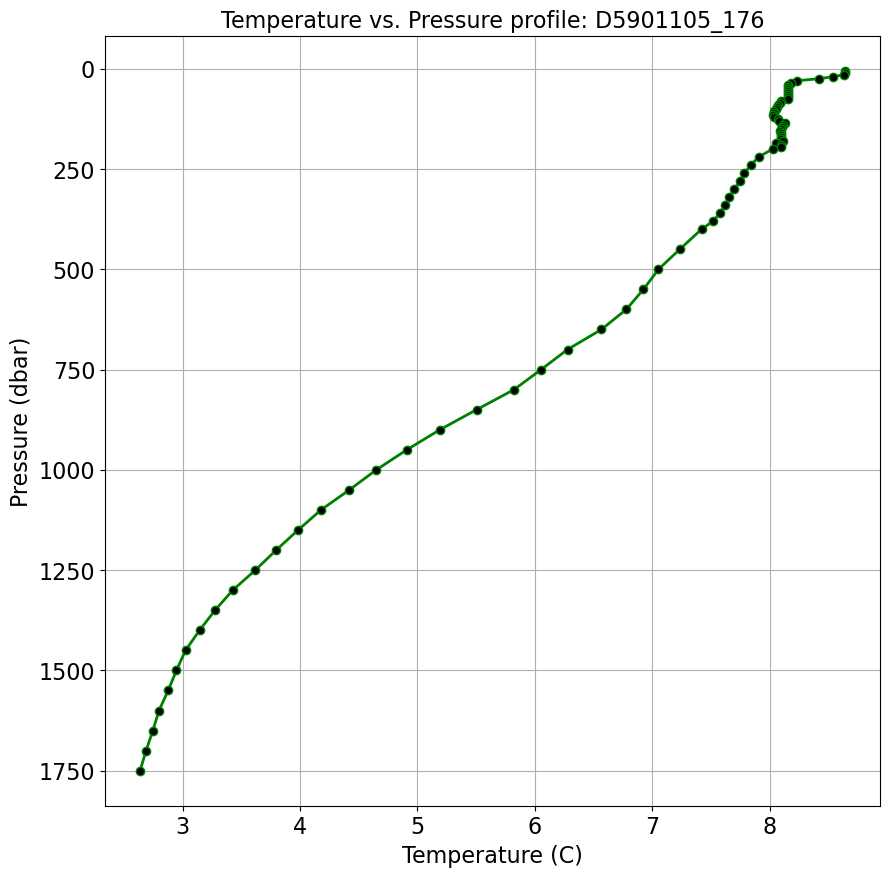

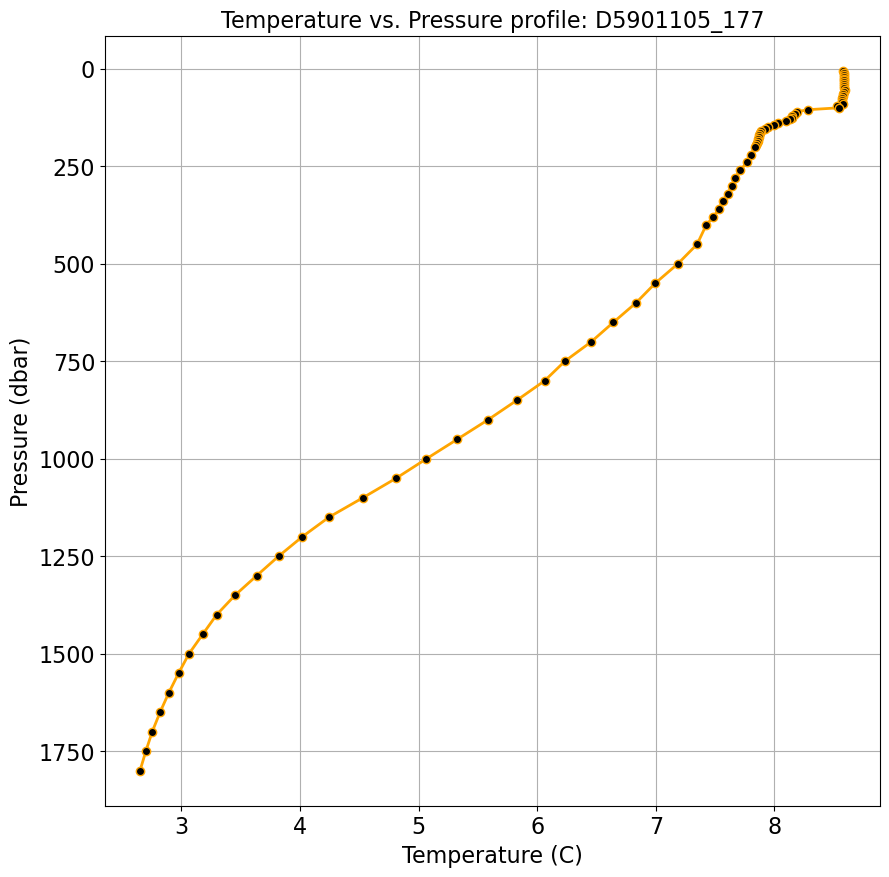

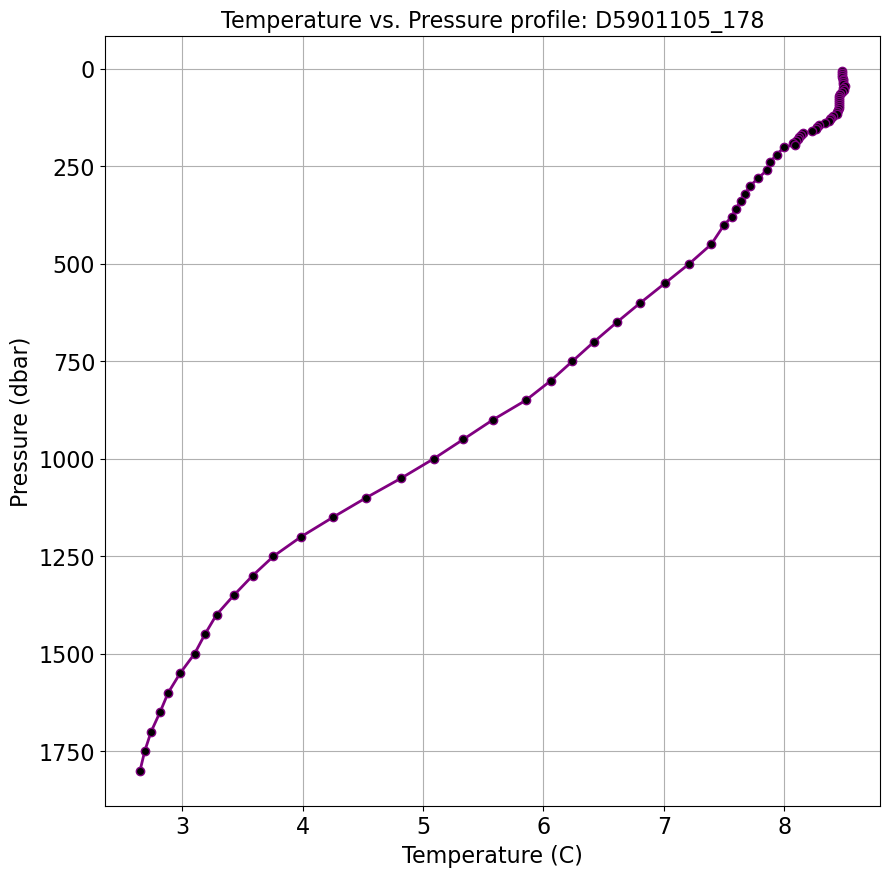

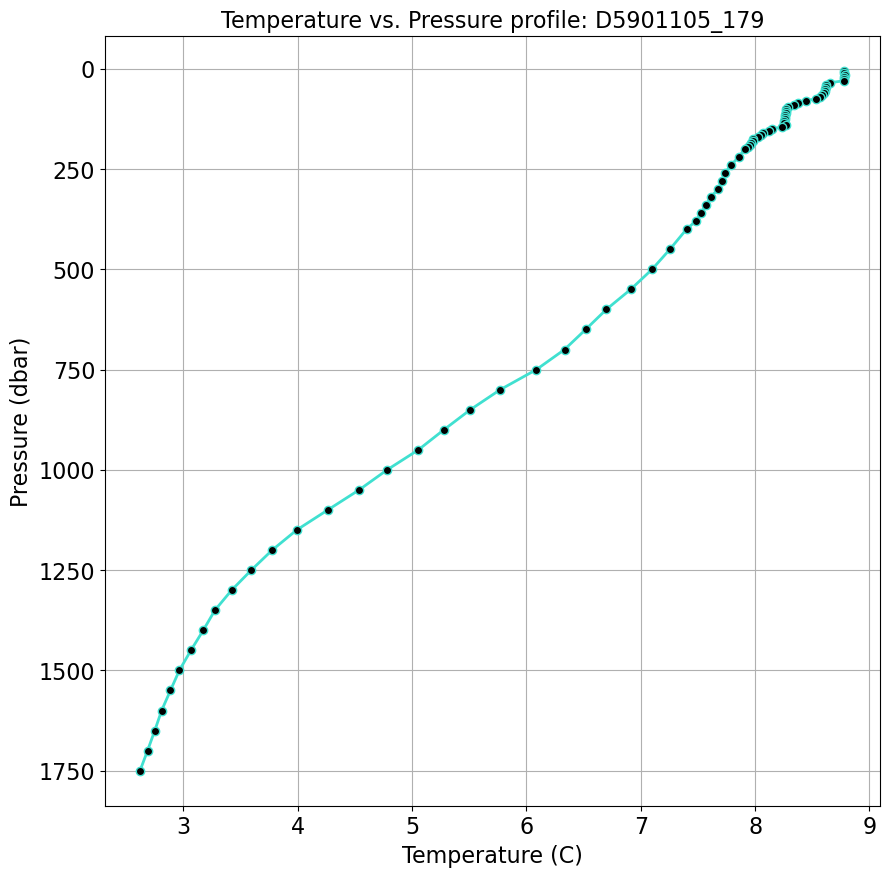

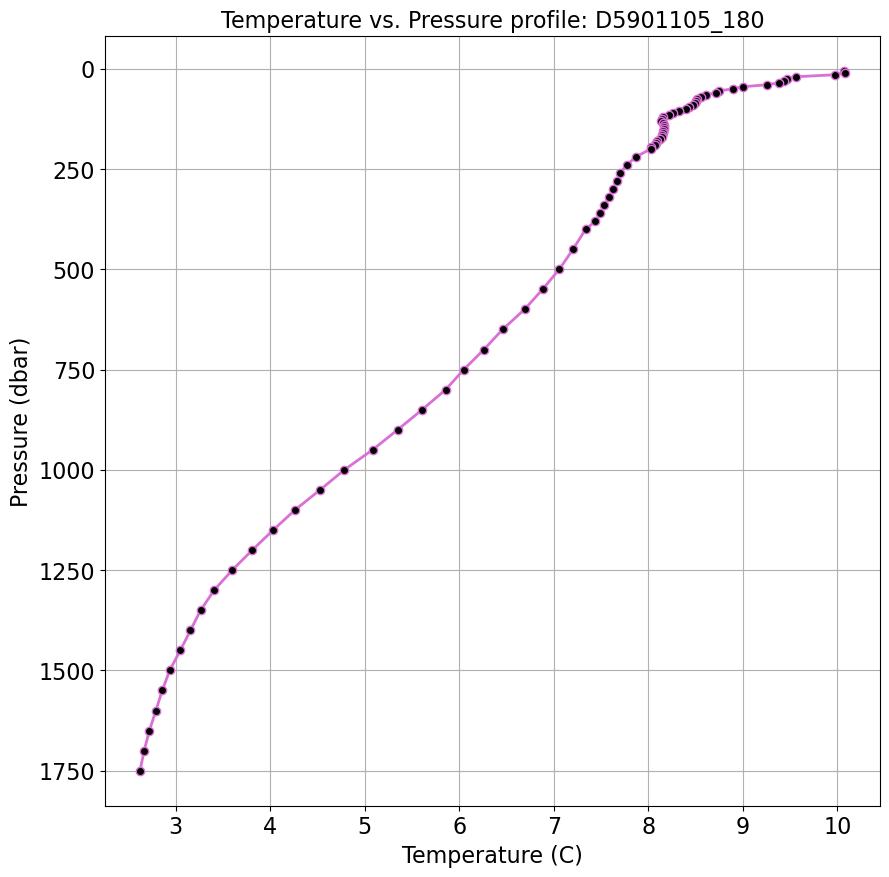

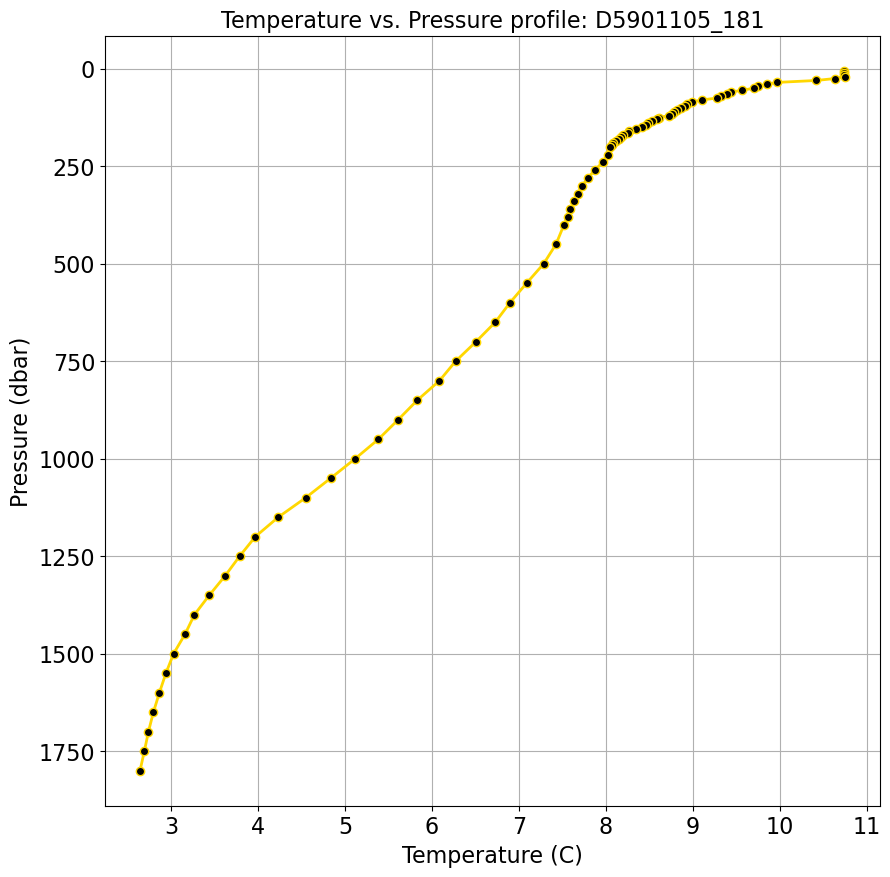

In [61]:
# Use the functions you just created in a for loop
for path, color in zip(filepaths, colors):
    # get my temperature and pressure data from each file path
    lat, lon, temp, pressure = prof_getdata(path)
    # plot temperarure vs. pressure
    plot_profile(temp=temp, pressure=pressure, name=path, line_color=color)

# Let's take a look at satellite chlorophyll data using SIMONS CMAP, an aggregator for Oceanographic data
- First, make an account through the Simons CMAP [website](https://simonscmap.com/)
- Next, create an API key and copy it to your clipboard
- Paste your API key below to access [CMAP](https://cmap.readthedocs.io/en/latest/user_guide/API_ref/pycmap_api/data_retrieval/pycmap_query.html#query) datasets

In [ ]:
import pycmap
import pandas as pd

# store your API key here
key = 
# query api 
api = 

# access data by querying 
#An example of how to query data from CMAP
query =  '''
         SELECT [time], lat, lon, chl FROM tblCHL_REP 
         WHERE 
         [time] BETWEEN '2016-06-01' AND '2016-06-08' AND 
         lat BETWEEN -90 AND 90 AND 
         lon BETWEEN -180 AND 180
         '''


### make a plot of chlorophyll data using matplotlib and cartopy

In [ ]:
import cartopy.crs as ccrs        
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm

# create figure
